In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
from pandas.plotting import scatter_matrix
import scipy
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder,LabelEncoder
import matplotlib
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_score,cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
df=df.drop(['id'],axis=1)
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
len(df)

5110

In [ ]:
df.groupby(['work_type'], as_index=False).count()

,work_type,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Govt_job,657,657,657,657,657,657,657,630,657,657
1,Never_worked,22,22,22,22,22,22,22,22,22,22
2,Private,2925,2925,2925,2925,2925,2925,2925,2811,2925,2925
3,Self-employed,819,819,819,819,819,819,819,775,819,819
4,children,687,687,687,687,687,687,687,671,687,687


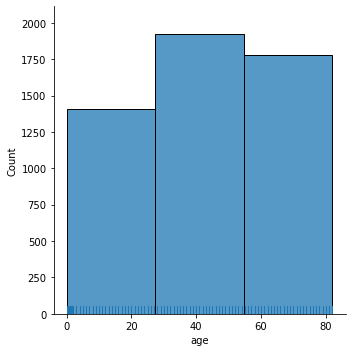

In [ ]:
sb.displot(df['age'], bins=3, kde=False, rug=True)

In [ ]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
temp_df=df.copy()

In [ ]:
temp_df['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [ ]:
temp_df['smoking_status'].value_counts()

never smoked       1892
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

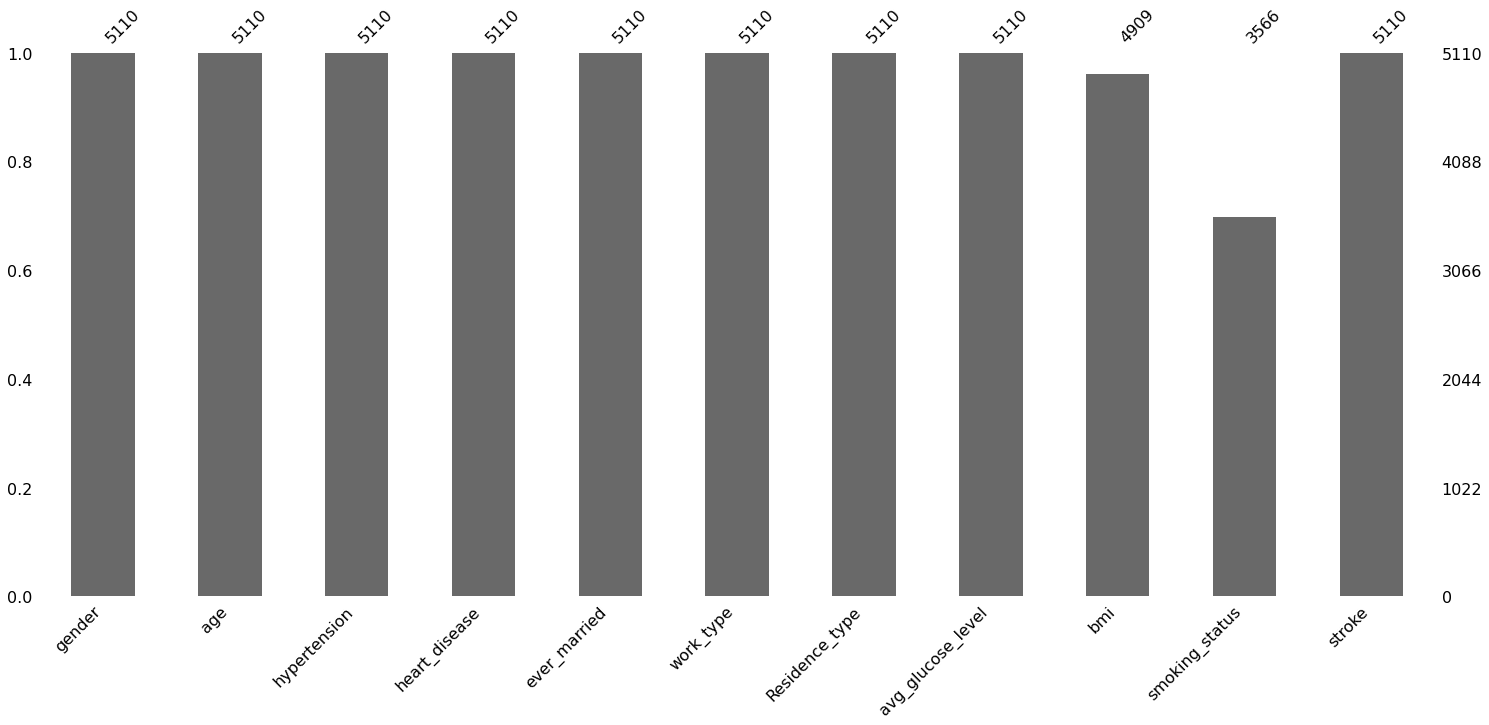

In [ ]:
import missingno as msno
msno.bar(temp_df)

In [ ]:
temp_df.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
unk_smoke=df[df.smoking_status=='Unknown']

In [ ]:
df.loc[(df.smoking_status=='formerly smoked') | (df.smoking_status=='smokes')].sort_values(by='age')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2013,Male,10.0,0,0,No,children,Urban,63.08,20.5,smokes,0
4535,Male,10.0,0,0,No,children,Rural,69.20,23.5,formerly smoked,0
1866,Male,10.0,0,0,No,children,Rural,99.87,NaN,formerly smoked,0
3044,Female,10.0,0,0,No,children,Rural,83.37,17.8,formerly smoked,0
4079,Female,10.0,0,0,No,children,Urban,82.59,18.6,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
128,Male,82.0,0,0,Yes,Govt_job,Urban,200.59,29.0,formerly smoked,1
3388,Female,82.0,0,0,Yes,Self-employed,Rural,78.00,31.3,formerly smoked,0
3462,Male,82.0,0,0,Yes,Self-employed,Urban,214.51,24.0,formerly smoked,0
1691,Male,82.0,0,0,Yes,Private,Urban,144.20,35.4,smokes,0


In [ ]:
def impute_smoking(row):
  if row['smoking_status']=='Unknown':
    if row['age']<10:
      row['smoking_status']='never smoked'

  return row

In [ ]:
df=df.apply(lambda row: impute_smoking(row),axis=1)

In [ ]:
df.loc[(df.smoking_status=='Unknown')].sort_values(by='age')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
667,Male,10.0,0,0,No,children,Rural,59.49,18.3,Unknown,0
4799,Female,10.0,0,0,No,children,Urban,109.30,20.1,Unknown,0
4927,Female,10.0,0,0,No,children,Rural,69.84,13.7,Unknown,0
1942,Male,10.0,0,0,No,children,Urban,88.69,30.4,Unknown,0
3004,Female,10.0,0,0,No,children,Rural,93.29,20.6,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
3422,Female,82.0,0,0,Yes,Self-employed,Rural,84.42,25.7,Unknown,0
2418,Female,82.0,0,1,Yes,Self-employed,Rural,229.58,23.7,Unknown,0
1068,Female,82.0,0,0,Yes,Private,Rural,96.63,26.5,Unknown,0
1529,Female,82.0,0,0,Yes,Private,Urban,253.16,47.5,Unknown,0


In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418
smoking_status,4


In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df = df[(df.gender != 'Other')]

In [ ]:
import math
df['age']=df['age'].apply(lambda x: math.floor(x))

<ipython-input-204-96634dc7f98b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=df['age'].apply(lambda x: math.floor(x))


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df=df[df['smoking_status']!='Unknown']

In [ ]:
len(df)

4037

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,Female,57,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5105,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  153
smoking_status         0
stroke                 0
dtype: int64

###Imputing BMI with Gradient boosting regressor

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler=StandardScaler()
encoder=LabelEncoder()

In [ ]:
df_copy=df.copy()
categorical_fea=[feature for feature in df_copy.columns if df_copy[feature].dtypes=='object']
# categorical_fea=['gender','ever_married','Residence_type']
for feature in categorical_fea:
  df_copy[feature]=encoder.fit_transform(df_copy[feature])
  print(encoder.classes_)

['Female' 'Male']
['No' 'Yes']
['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
['Rural' 'Urban']
['formerly smoked' 'never smoked' 'smokes']


In [ ]:
train=df_copy[df_copy['bmi'].notna()]
test=df_copy[~df_copy['bmi'].notna()]

In [ ]:
train_scaled=train.copy()
train_scaled[['age','avg_glucose_level']]=scaler.fit_transform(train_scaled[['age','avg_glucose_level']])
test_scaled=test.copy()
test_scaled[['age','avg_glucose_level']]=scaler.transform(test_scaled[['age','avg_glucose_level']])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
linmodel=GradientBoostingRegressor()
linmodel.fit(train_scaled.drop(['bmi'],axis=1),train_scaled['bmi'])                              

GradientBoostingRegressor()

In [ ]:
test['bmi']=linmodel.predict(test_scaled.drop(['bmi'],axis=1))

<ipython-input-215-eabae2c1fca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['bmi']=linmodel.predict(test_scaled.drop(['bmi'],axis=1))


In [ ]:
test['bmi']=test['bmi'].apply(lambda x:round(x,1))

<ipython-input-216-0cc109b77f92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['bmi']=test['bmi'].apply(lambda x:round(x,1))


In [ ]:
test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,0,61,0,0,1,3,0,202.21,34.5,1,1
29,1,59,0,0,1,2,0,211.78,35.6,0,1
43,0,63,0,0,1,2,1,90.90,30.5,0,1
51,1,78,1,0,1,2,1,75.32,27.4,0,1
54,0,63,0,0,1,0,1,197.54,33.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,1,41,0,0,0,2,0,70.15,30.2,0,0
5048,1,40,0,0,1,2,1,191.15,33.7,2,0
5093,0,45,1,0,1,0,0,95.02,34.3,2,0
5099,1,40,0,0,1,2,0,83.94,30.4,2,0


In [ ]:
df_full=pd.concat([train,test],ignore_index=True)

In [ ]:
df_full.to_csv('df_fixed.csv',index=False)

###EDA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
df=df.drop(['id'],axis=1)

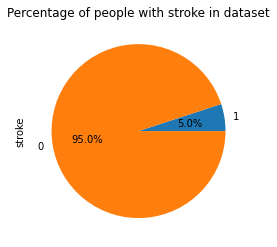

In [ ]:
df['stroke'].value_counts().sort_values().plot(kind = 'pie',autopct='%1.1f%%',title="Percentage of people with stroke in dataset")

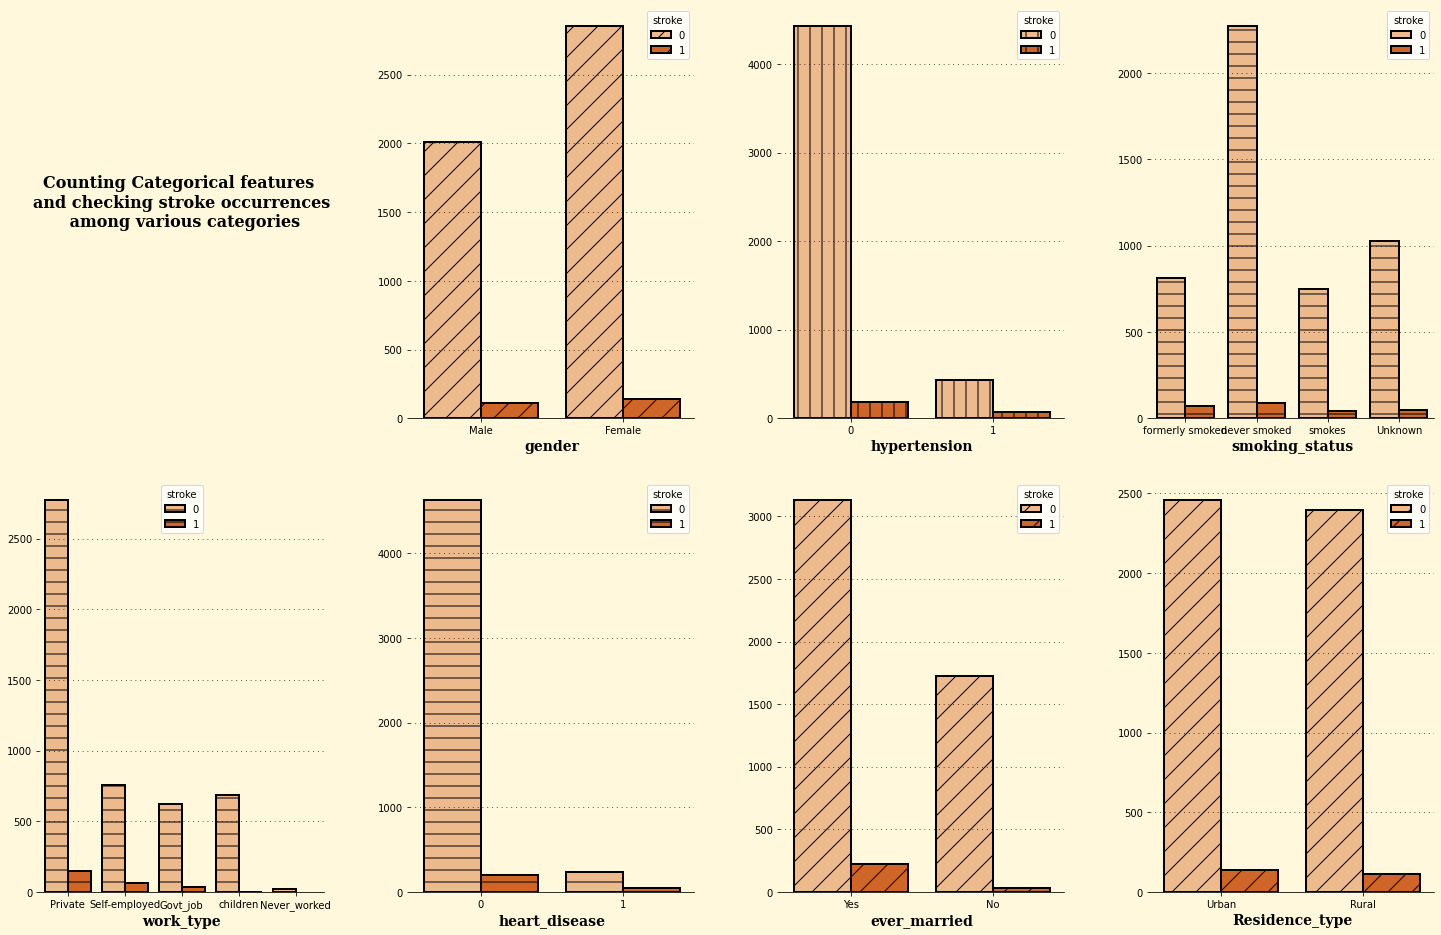

In [ ]:
fig = plt.figure(figsize=(25,25))
gs = fig.add_gridspec(3,4)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[-2,0])
ax6 = fig.add_subplot(gs[1,3])
ax7 = fig.add_subplot(gs[0,3])

background_color = "#FFF8DC"

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Counting Categorical features \nand checking stroke occurrences\n among various categories\n",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 16,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)


ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sb.countplot(ax=ax1, data=df, x='gender',palette = 'Oranges', hue='stroke',edgecolor='black',**{'hatch':'/','linewidth':2})
ax1.set_xlabel("gender",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sb.countplot(ax=ax2, data=df, x='hypertension',palette = 'Oranges', hue='stroke',edgecolor='black',**{'hatch':'|','linewidth':2})
ax2.set_xlabel("hypertension",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sb.countplot(ax=ax3, data=df, x='heart_disease',palette = 'Oranges',hue='stroke',edgecolor='black',**{'hatch':'-','linewidth':2})
ax3.set_xlabel("heart_disease",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sb.countplot(ax=ax4, data=df, x='ever_married',palette = 'Oranges',hue='stroke',edgecolor='black',**{'hatch':'/','linewidth':2})
ax4.set_xlabel("ever_married",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sb.countplot(ax=ax5, data=df, x='work_type',palette = 'Oranges',hue='stroke',edgecolor='black',**{'hatch':'-','linewidth':2})
ax5.set_xlabel("work_type",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sb.countplot(ax=ax6, data=df, x='Residence_type',palette = 'Oranges',hue='stroke',edgecolor='black',**{'hatch':'/','linewidth':2})
ax6.set_xlabel("Residence_type",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sb.countplot(ax=ax7, data=df, x='smoking_status',palette = 'Oranges',hue='stroke',edgecolor='black',**{'hatch':'-','linewidth':2})
ax7.set_xlabel("smoking_status",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)

ax4.spines["top"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.spines["right"].set_visible(False)

ax5.spines["top"].set_visible(False)
ax5.spines["left"].set_visible(False)
ax5.spines["right"].set_visible(False)

ax6.spines["top"].set_visible(False)
ax6.spines["left"].set_visible(False)
ax6.spines["right"].set_visible(False)

ax7.spines["top"].set_visible(False)
ax7.spines["left"].set_visible(False)
ax7.spines["right"].set_visible(False)

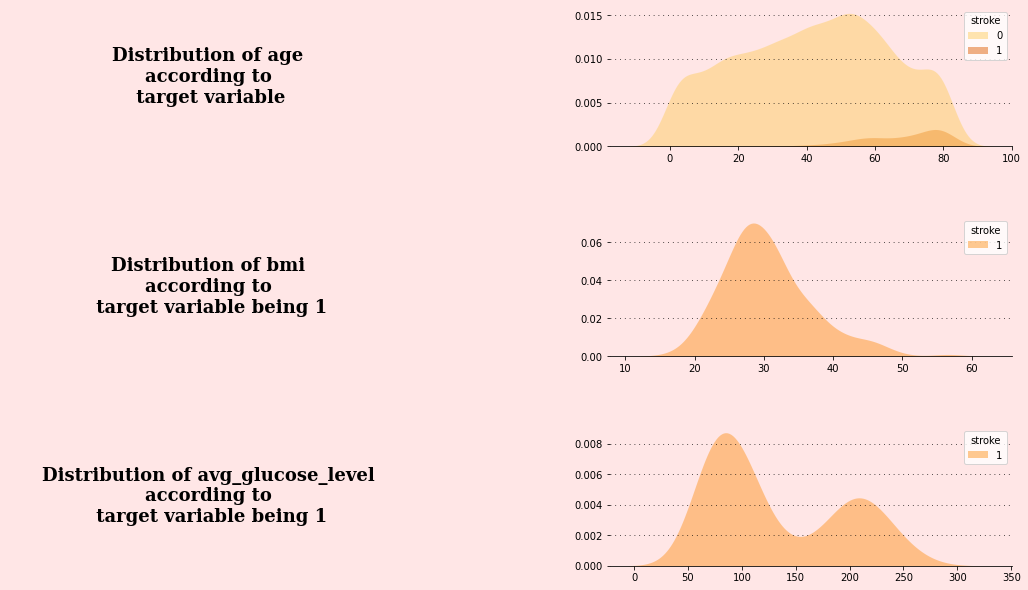

In [ ]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])

background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sb.kdeplot(ax=ax1, data=df, x='age',hue="stroke", fill=True,palette="YlOrBr", alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# bmi title
ax2.text(0.5,0.5,"Distribution of bmi\naccording to\n target variable being 1",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# bmi
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sb.kdeplot(ax=ax3, data=df.loc[df['stroke']==1], x='bmi',hue="stroke", fill=True,palette="YlOrBr", alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# avg_glucose_level title
ax4.text(0.5,0.5,"Distribution of avg_glucose_level\naccording to\n target variable being 1",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# avg_glucose_level
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sb.kdeplot(ax=ax5, data=df.loc[df['stroke']==1], x='avg_glucose_level',hue="stroke", fill=True,palette="YlOrBr", alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")



for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

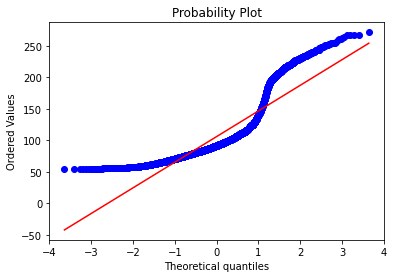

In [ ]:
scipy.stats.probplot(df['avg_glucose_level'],dist='norm',plot=matplotlib.pyplot);

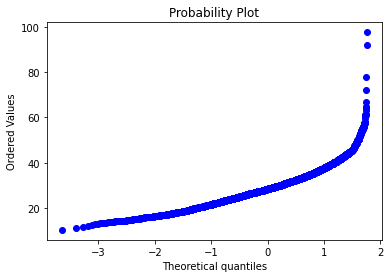

In [ ]:
scipy.stats.probplot(df['bmi'],dist='norm',plot=matplotlib.pyplot);

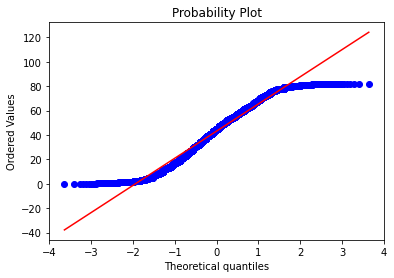

In [ ]:
scipy.stats.probplot(df['age'],dist='norm',plot=matplotlib.pyplot);

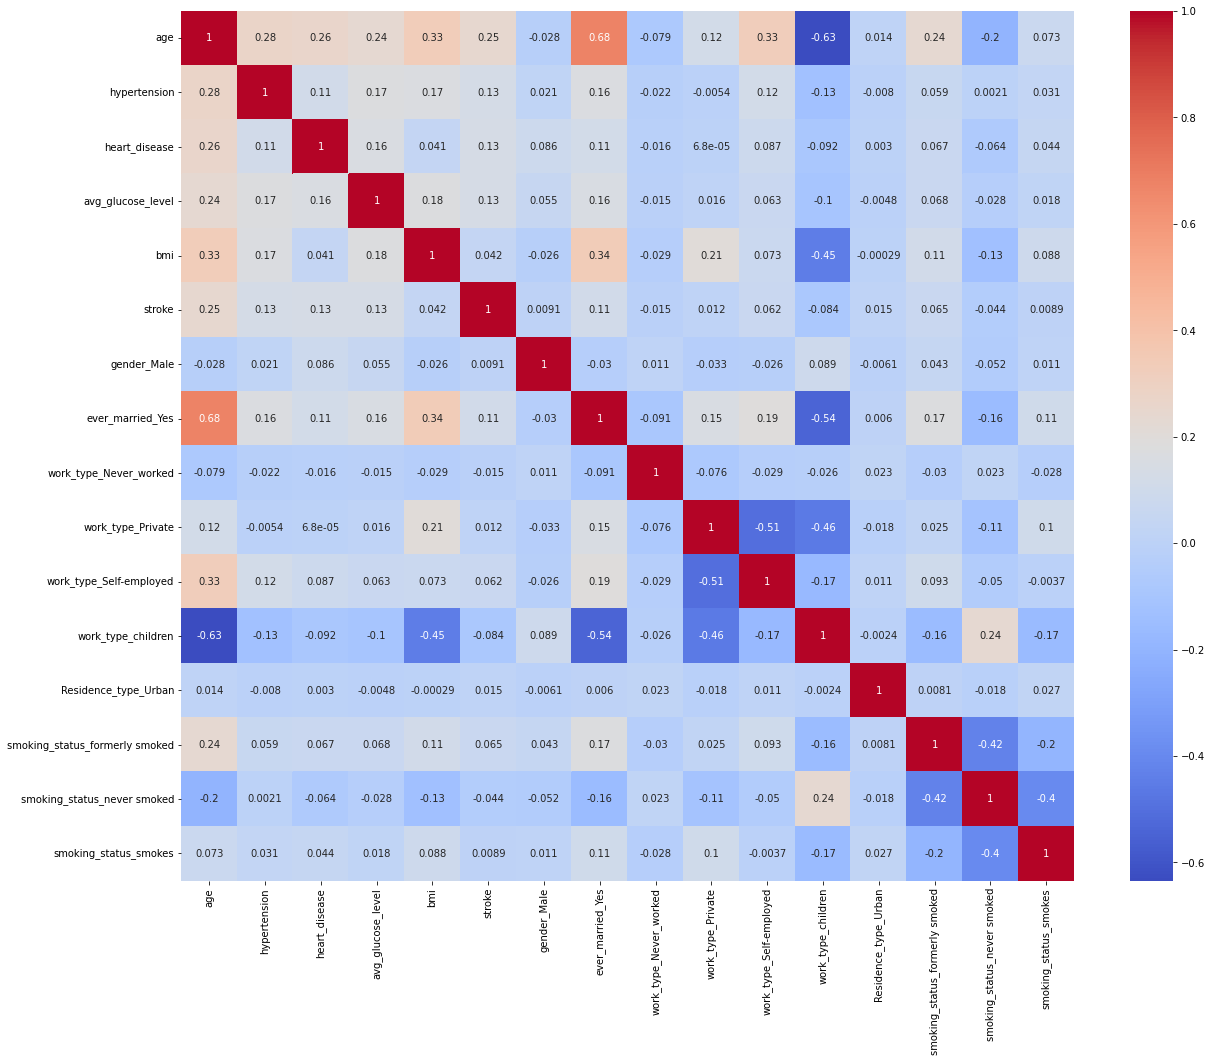

In [ ]:
temp_dataset = pd.get_dummies(df, drop_first = True)
plt.subplots(figsize=(20,16))
sb.heatmap(temp_dataset.corr(), annot = True, cmap='coolwarm')

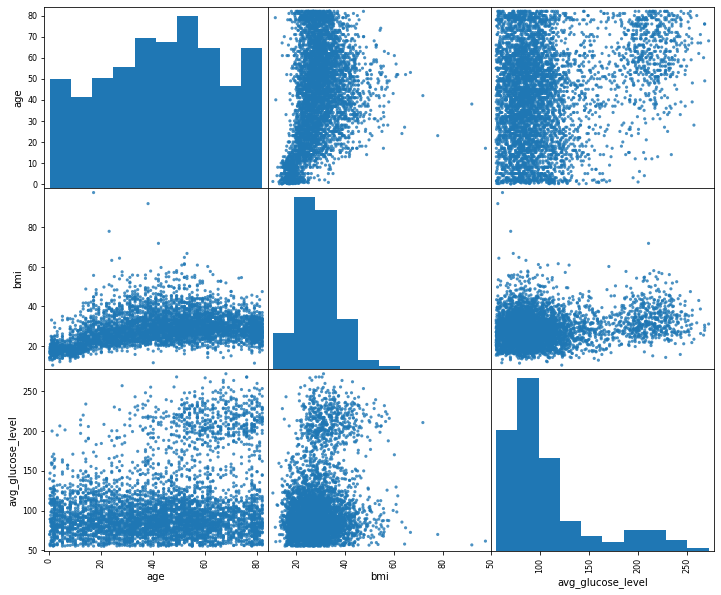

In [ ]:
plot = scatter_matrix(df.loc[:,['age','bmi','avg_glucose_level']],figsize=(12,10),marker='o',s=10,alpha=.8)

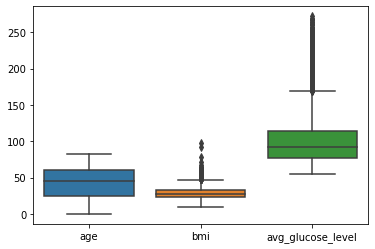

In [ ]:
sb.boxplot(data=df[['age','bmi','avg_glucose_level']])

They may seem like outliners, but bmi and avg glucose levels can be this high. High BMI is a result of highly obese people and the glucose level could reach these highs per reading.

**CONCLUSIONS**:
1.   Equal number of strokes in males in females in our dataset, in reality women have a bigger chance
2.   Correlation between work_type_children in age which is logical, people who are younger do now work. We can say the same about is_married_yes
3.   Stroke has the highest correlation with age
4.   We will fill out bmi missing values using KNN imputer
5.   No data will be considered an outlier except the 'Other' in gender
6.   BMI follows a normal distribution
7.   We will keep the 'Unknown value' for smoking_status as a attribute
8.   People that do not have a heart disease are more likely to have a stroke
9.   Urban and Rural have the same numbers for stroke and we will drop this column
10.  Smoking doesn't have an impact on stroke in our dataset, in reality it does


